## 단계3. 모델링

## 0.미션

* 1.시계열 데이터에 맞는 전처리
    * 데이터가 2015 ~ 2022년까지 데이터 입니다.
    * 이 중 2022년 10월 ~ 2022년 12월까지(3개월)의 데이터는 성능 검증용으로 사용합니다.
    * 나머지 데이터를 이용하여 학습 및 튜닝을 수행합니다.
    * 이를 위한 데이터 전처리를 수행하시오.
* 2.모델 최적화
    * 머신러닝
        * 알고리즘 중 3가지 이상을 선정하여 모델링을 수행합니다.
        * 각각 알고리즘에 맞는 튜닝 방법으로 최적의 모델을 만듭니다.
    * 딥러닝
        * 모델 구조를 2가지 이상을 생성하고 모델링을 수행합니다.
        * epochs, learning_rate 등을 조절하며 성능을 튜닝합니다.
    * 성능 평가
        * 시계열 그래프로 모델의 실제값과 예측값을 시각화하여 비교합니다.
        * 성능 지표 (MAE, MAPE) 를 사용해 가장 성능이 높은 모델을 선정합니다.
        * 성능 가이드
            * MAE : 4 ~ 6
            * MAPE : 0.09~0.14

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

In [ ]:
data= joblib.load('/content/drive/MyDrive/미니프로젝트/2차_미세먼지 농도 예측, 장애인 콜택시 대기시간 예측 머신러닝 모델/2023.09.12_미니프로젝트2차_2일차 장애인 콜택시 대기시간 예측/data2.pkl')

## 2.데이터 준비
* **세부요구사항**
    * NaN에 대한 조치를 수행하시오.
        * rolling 혹은 shift로 발생된 초기 행의 NaN은 삭제해도 무방합니다.
    * 가변수화 : 범주형에 대해서 가변수화를 수행합니다.
    * 데이터분할
        * 시계열 데이터 특성에 맞게 분할합니다.
        * 마지막 91일(3개월) 데이터를 검증셋으로 사용합니다.

### (1) NA 조치

In [ ]:
data.isnull().sum()

Date            0
waiting_time    0
avg7day         6
ride_rate       0
holiday         0
weekday         0
month           0
season          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2921 entries, 0 to 2920
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2921 non-null   datetime64[ns]
 1   waiting_time  2921 non-null   float64       
 2   avg7day       2915 non-null   float64       
 3   ride_rate     2921 non-null   float64       
 4   holiday       2921 non-null   int64         
 5   weekday       2921 non-null   object        
 6   month         2921 non-null   int64         
 7   season        2921 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 205.4+ KB


In [ ]:
data = data.dropna()
data.isnull().sum()

Date            0
waiting_time    0
avg7day         0
ride_rate       0
holiday         0
weekday         0
month           0
season          0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 6 to 2920
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2915 non-null   datetime64[ns]
 1   waiting_time  2915 non-null   float64       
 2   avg7day       2915 non-null   float64       
 3   ride_rate     2915 non-null   float64       
 4   holiday       2915 non-null   int64         
 5   weekday       2915 non-null   object        
 6   month         2915 non-null   int64         
 7   season        2915 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 205.0+ KB


In [ ]:
data.head(7)

,Date,waiting_time,avg7day,ride_rate,holiday,weekday,month,season
6,2015-01-07,24.7,23.657143,89.987760,0,Wednesday,1,Winter
7,2015-01-08,21.2,23.371429,92.506203,0,Thursday,1,Winter
8,2015-01-09,21.8,24.028571,91.504680,0,Friday,1,Winter
9,2015-01-10,41.2,26.171429,85.855950,0,Saturday,1,Winter
10,2015-01-11,28.8,26.785714,92.470588,0,Sunday,1,Winter
11,2015-01-12,23.2,26.357143,92.618712,0,Monday,1,Winter
12,2015-01-13,25.6,26.642857,90.604333,0,Tuesday,1,Winter


### (2) 가변수화

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 6 to 2920
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2915 non-null   datetime64[ns]
 1   waiting_time  2915 non-null   float64       
 2   avg7day       2915 non-null   float64       
 3   ride_rate     2915 non-null   float64       
 4   holiday       2915 non-null   int64         
 5   weekday       2915 non-null   object        
 6   month         2915 non-null   int64         
 7   season        2915 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 205.0+ KB


In [ ]:
dumm_cols = ['weekday', 'season']
data = pd.get_dummies(data, columns=dumm_cols)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2915 entries, 6 to 2920
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               2915 non-null   datetime64[ns]
 1   waiting_time       2915 non-null   float64       
 2   avg7day            2915 non-null   float64       
 3   ride_rate          2915 non-null   float64       
 4   holiday            2915 non-null   int64         
 5   month              2915 non-null   int64         
 6   weekday_Friday     2915 non-null   uint8         
 7   weekday_Monday     2915 non-null   uint8         
 8   weekday_Saturday   2915 non-null   uint8         
 9   weekday_Sunday     2915 non-null   uint8         
 10  weekday_Thursday   2915 non-null   uint8         
 11  weekday_Tuesday    2915 non-null   uint8         
 12  weekday_Wednesday  2915 non-null   uint8         
 13  season_Fall        2915 non-null   uint8         
 14  season_S

### (3) 데이터분할
* **세부요구사항**
    * 마지막 91일 간의 데이터를 검증 셋으로 만듭니다. (2022-10-01 ~ )
    * 이 기간의 날짜 리스트를 별도로 저장하여, 모델 검증시 시각화할 때 활용합니다.

In [ ]:
idx = data[data['Date'] == '2022-10-01'].index[0]

train_data = data.loc[:idx]

test_data = data.loc[idx :]
test_date = test_data['Date']

#### 1) x, y 나누기

In [ ]:
# 'Date' column 제거
train_data.drop('Date', axis=1, inplace=True)
test_data.drop('Date', axis=1, inplace=True)

<ipython-input-201-ca416ce4b8ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.drop('Date', axis=1, inplace=True)
<ipython-input-201-ca416ce4b8ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop('Date', axis=1, inplace=True)


In [ ]:
# Target 설정
target='waiting_time'

# 데이터 분리
x=data.drop(target,axis=1)
y=data[target]

In [ ]:
x_train = train_data.drop(target, axis=1).values
y_train = train_data[target].values

x_test = test_data.drop(target, axis=1).values
y_test = test_data[target].values

#### 2) train : validation 나누기

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=91,shuffle = False)

In [ ]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(2824, 15)
(91, 15)
(2824,)
(91,)


### (4) Scaling
* KNN, SVM 알고리즘 및 DL을 적용하기 위해서는 스케일링을 해야 합니다.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)

## 3.모델링
* **세부요구사항**
    * 머신러닝 알고리즘 중 3가지 이상을 사용하여 모델을 만들고 튜닝을 수행합니다.
    * 딥러닝 모델 구조 2가지 이상을 설계하고 모델을 생성합니다.
    * 성능 측정은 MAE, MAPE로 수행합니다.
    * 모델링 후 실제값과 예측값을 시각화(라인차트)하여 분석합니다.

### (1) 머신러닝
#### 1) 모델1

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

y_pred_lr = lr_model.predict(x_val)

# 결과 출력
print(f'MAE: {mean_absolute_error(y_val, y_pred_lr)}')
print(f'MAPE: {mean_absolute_percentage_error(y_val, y_pred_lr)}')

MAE: 3.497647098768935
MAPE: 0.08884623038319245


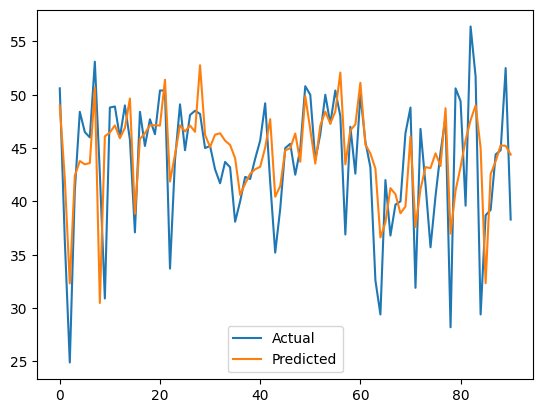

In [ ]:
plt.plot(y_val.values)
plt.plot(y_pred_lr)
plt.legend(['Actual', 'Predicted'])
plt.show()

#### 1) 모델2

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(max_depth=5, random_state=2023)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_val)

# 결과 출력
print(f'MAE: {mean_absolute_error(y_val, y_pred_rf)}')
print(f'MAPE: {mean_absolute_percentage_error(y_val, y_pred_rf)}')

MAE: 3.307534177681667
MAPE: 0.08444482310886554


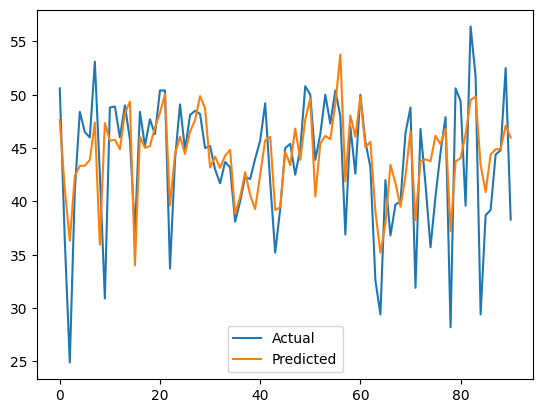

In [ ]:
plt.plot(y_val.values)
plt.plot(y_pred_rf)
plt.legend(['Actual', 'Predicted'])
plt.show()

#### 1) 모델3

In [ ]:
import xgboost as xgb
XGBmodel = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
XGBmodel.fit(x_train, y_train)

y_pred_xgb = XGBmodel.predict(x_val)

print(f'MAE: {mean_absolute_error(y_val, y_pred_xgb)}')
print(f'MAPE: {mean_absolute_percentage_error(y_val, y_pred_xgb)}')

MAE: 4.3396480518382985
MAPE: 0.10945211722745822


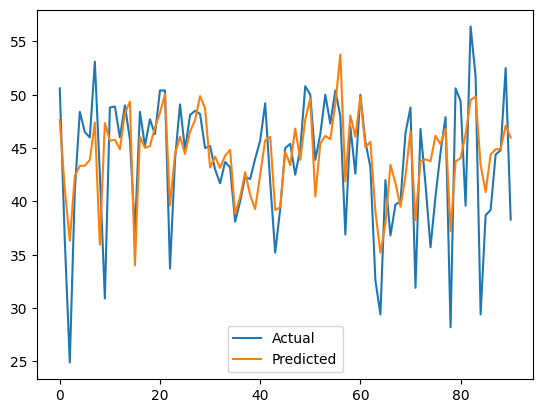

In [ ]:
plt.plot(y_val.values)
plt.plot(y_pred_rf)
plt.legend(['Actual', 'Predicted'])
plt.show()

### (2) 딥러닝

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# 세션 초기화
tf.keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(15, ))
hl = Dense(512, activation='relu')(il)
hl = BatchNormalization()(hl)
hl = Dense(256, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dense(128, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.2)(hl)
hl = Dense(64, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1)(hl)

# 모델 선언
model = tf.keras.models.Model(il, ol)

# 컴파일
model.compile(loss='mae', metrics=['mape'], optimizer='adam')

# summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 512)               8192      
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 128)               32896 

In [ ]:
es = EarlyStopping(patience=5, verbose=1)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=100, callbacks=[es])

Epoch 1/100
89/89 [==============================] - 4s 11ms/step - loss: 39.7015 - mape: 98.0102 - val_loss: 42.3463 - val_mape: 96.7594
Epoch 2/100
89/89 [==============================] - 1s 7ms/step - loss: 37.8709 - mape: 92.8012 - val_loss: 40.1187 - val_mape: 91.5629
Epoch 3/100
89/89 [==============================] - 1s 7ms/step - loss: 33.9950 - mape: 81.7500 - val_loss: 36.6890 - val_mape: 83.2335
Epoch 4/100
89/89 [==============================] - 1s 7ms/step - loss: 27.4992 - mape: 63.3894 - val_loss: 27.3394 - val_mape: 61.6349
Epoch 5/100
89/89 [==============================] - 1s 7ms/step - loss: 18.5669 - mape: 43.0167 - val_loss: 12.0205 - val_mape: 27.0790
Epoch 6/100
89/89 [==============================] - 1s 7ms/step - loss: 9.6564 - mape: 23.5534 - val_loss: 5.6855 - val_mape: 13.3221
Epoch 7/100
89/89 [==============================] - 1s 8ms/step - loss: 6.4095 - mape: 16.5688 - val_loss: 4.6519 - val_mape: 11.4371
Epoch 8/100
89/89 [=========================

Exception ignored in: <function _xla_gc_callback at 0x7d9abe5ed7e0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


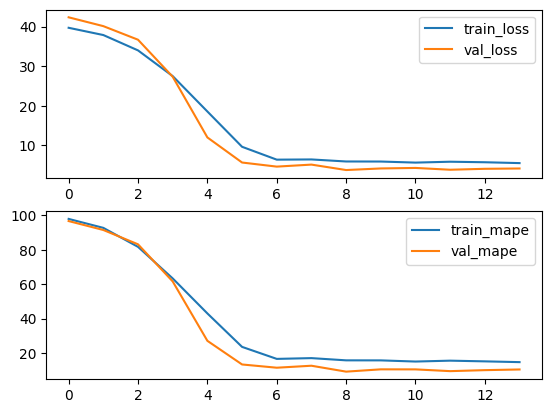

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['mape'], label='train_mape')
plt.plot(history.history['val_mape'], label='val_mape')
plt.legend()
plt.show()

In [ ]:
# 세션 초기화
tf.keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(15, ))
hl = Dense(128, activation='relu')(il)
hl = Dense(128, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dense(64, activation='relu')(hl)
hl = Dense(64, activation='relu')(hl)
hl = BatchNormalization()(hl)
hl = Dropout(0.2)(hl)
ol = Dense(1)(hl)

# 모델 선언
model = tf.keras.models.Model(il, ol)

# 컴파일
model.compile(loss='mae', metrics=['mape'], optimizer='adam')

# summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 128)               2048      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                             

In [ ]:
es = EarlyStopping(patience=5, verbose=1)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=100, callbacks=[es])

Epoch 1/100
89/89 [==============================] - 4s 15ms/step - loss: 39.7520 - mape: 98.6768 - val_loss: 42.7149 - val_mape: 97.6401
Epoch 2/100
89/89 [==============================] - 1s 9ms/step - loss: 38.0106 - mape: 93.7208 - val_loss: 40.3060 - val_mape: 91.9805
Epoch 3/100
89/89 [==============================] - 1s 10ms/step - loss: 34.1862 - mape: 83.0294 - val_loss: 34.3598 - val_mape: 77.9563
Epoch 4/100
89/89 [==============================] - 1s 9ms/step - loss: 27.6584 - mape: 65.6711 - val_loss: 25.5031 - val_mape: 57.4101
Epoch 5/100
89/89 [==============================] - 1s 9ms/step - loss: 18.5926 - mape: 43.1223 - val_loss: 10.8174 - val_mape: 24.0798
Epoch 6/100
89/89 [==============================] - 1s 6ms/step - loss: 9.5565 - mape: 22.9591 - val_loss: 4.4346 - val_mape: 10.9226
Epoch 7/100
89/89 [==============================] - 1s 6ms/step - loss: 6.3750 - mape: 16.4146 - val_loss: 4.7505 - val_mape: 11.3908
Epoch 8/100
89/89 [========================

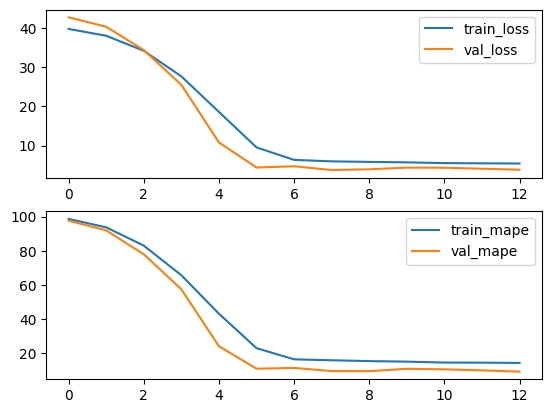

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['mape'], label='train_mape')
plt.plot(history.history['val_mape'], label='val_mape')
plt.legend()
plt.show()

In [ ]:
# 세션 초기화
tf.keras.backend.clear_session()

# 모델 쌓기
il = Input(shape=(15, ))
hl = Dense(64, activation='relu')(il)
hl = Dense(32, activation='relu')(hl)
ol = Dense(1)(hl)

# 모델 선언
model = tf.keras.models.Model(il, ol)

# 컴파일
model.compile(loss='mae', metrics=['mape'], optimizer='adam')

# summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 15)]              0         
                                                                 
 dense (Dense)               (None, 64)                1024      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
es = EarlyStopping(patience=5, verbose=1)
history = model.fit(x_train, y_train, validation_data=(x_val, y_val),
                    epochs=100, callbacks=[es])

Epoch 1/100
89/89 [==============================] - 2s 8ms/step - loss: 35.5857 - mape: 86.7358 - val_loss: 31.3457 - val_mape: 70.8720
Epoch 2/100
89/89 [==============================] - 0s 5ms/step - loss: 14.7209 - mape: 34.4831 - val_loss: 4.2050 - val_mape: 10.3898
Epoch 3/100
89/89 [==============================] - 1s 7ms/step - loss: 5.1057 - mape: 14.0212 - val_loss: 3.4468 - val_mape: 8.4326
Epoch 4/100
89/89 [==============================] - 1s 9ms/step - loss: 4.6606 - mape: 12.6574 - val_loss: 3.6805 - val_mape: 8.7758
Epoch 5/100
89/89 [==============================] - 1s 9ms/step - loss: 4.5615 - mape: 12.3862 - val_loss: 3.6076 - val_mape: 8.8577
Epoch 6/100
89/89 [==============================] - 1s 8ms/step - loss: 4.4900 - mape: 12.1385 - val_loss: 3.5655 - val_mape: 8.7054
Epoch 7/100
89/89 [==============================] - 1s 8ms/step - loss: 4.4298 - mape: 11.9680 - val_loss: 3.6668 - val_mape: 8.9736
Epoch 8/100
89/89 [==============================] - 1s 7

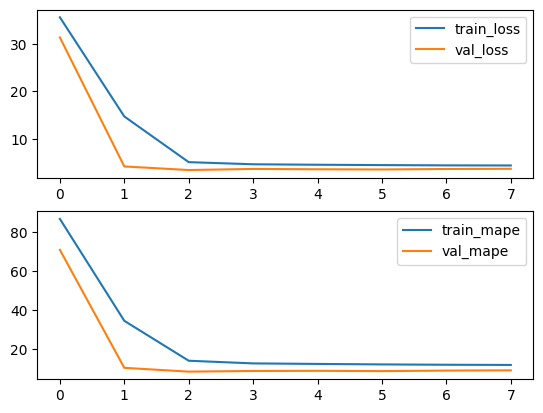

In [ ]:
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['mape'], label='train_mape')
plt.plot(history.history['val_mape'], label='val_mape')
plt.legend()
plt.show()